# Breast Cancer Wisconsin (Diagnostic) Data Set

#### 1) Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


C:\Users\arpithar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### 2) Load the dataset using pandas

In [2]:
data=pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


#### 3) Get details about the features present in the dataset

In [3]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


ID cannot be used for classification.
Unnamed: 32 contains NaN in all the rows.
Both these features do not affect classification and can be dropped

The column "diagnosis" is the output of the classification: B or M

#### 4) Drop unnecessary features

In [4]:
data=data.drop(["id","Unnamed: 32"],axis=1)

In [5]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 5) Plot the dataset

This gives an idea about how the all features are related and how they affect classification

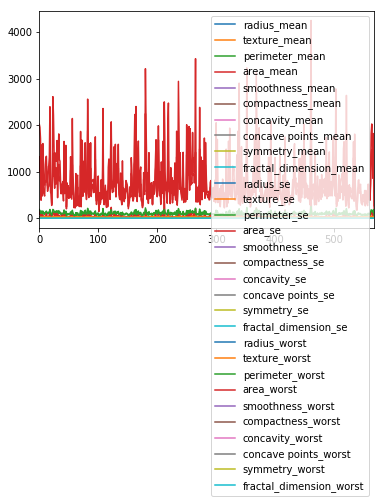

In [6]:
y=data["diagnosis"]
x=data.drop("diagnosis",axis=1)
data.plot()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

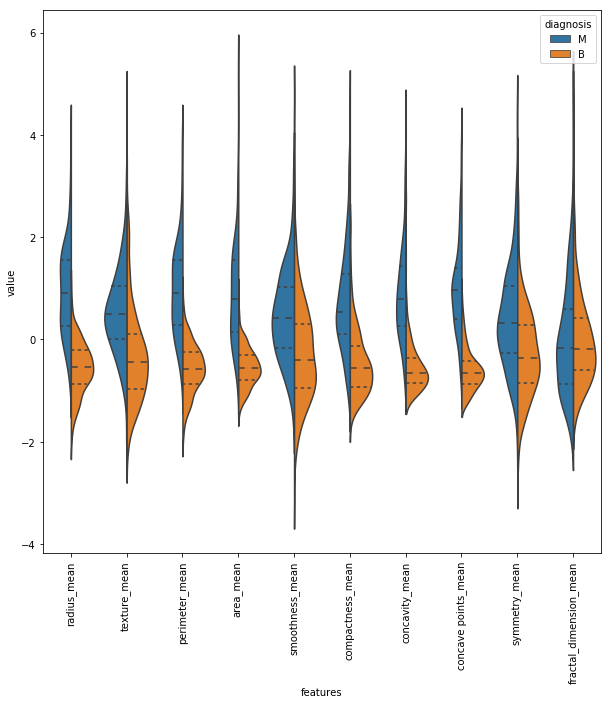

In [7]:
data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

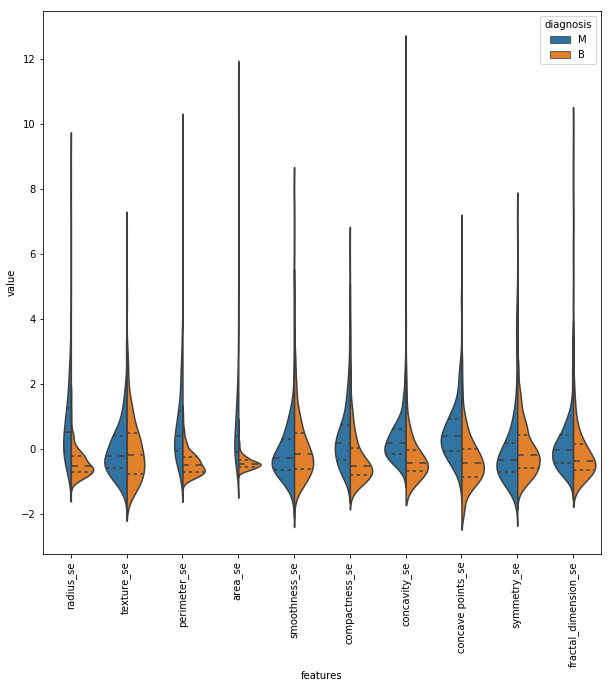

In [8]:
data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

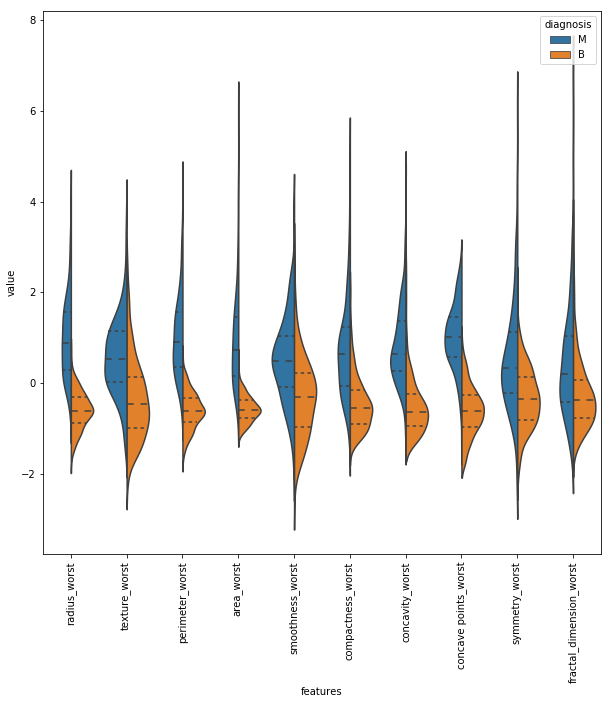

In [9]:
data_dia = y
data = x
data2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data2.iloc[:,20:30]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Similar looking figures imply that those features may be related. Some related features can be seen in these scatter plots.

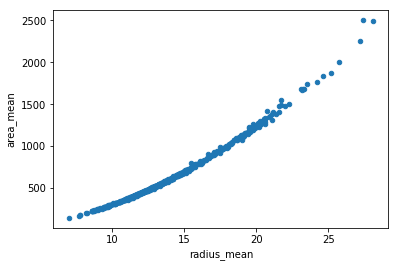

In [10]:
x.plot(kind="scatter",x="radius_mean",y="area_mean")

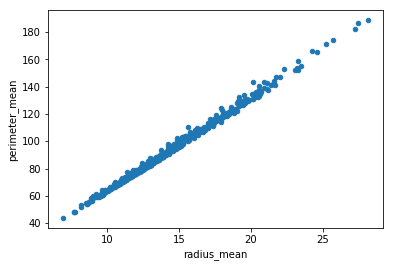

In [11]:
x.plot(kind="scatter",x="radius_mean",y="perimeter_mean")

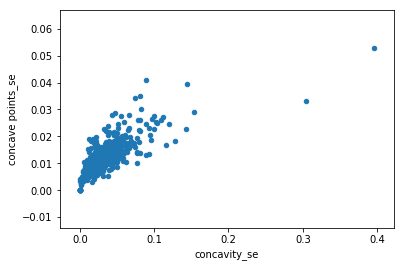

In [12]:
x.plot(kind="scatter",x="concavity_se",y="concave points_se")

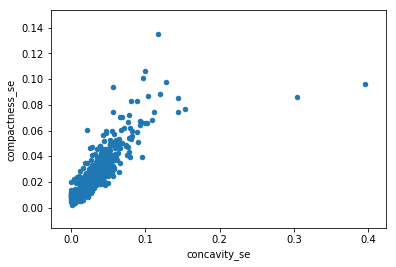

In [13]:
x.plot(kind="scatter",x="concavity_se",y="compactness_se")

The relation between features is shown below in a heatmap.
Higher the pearson correlation, higher is the relationship between features

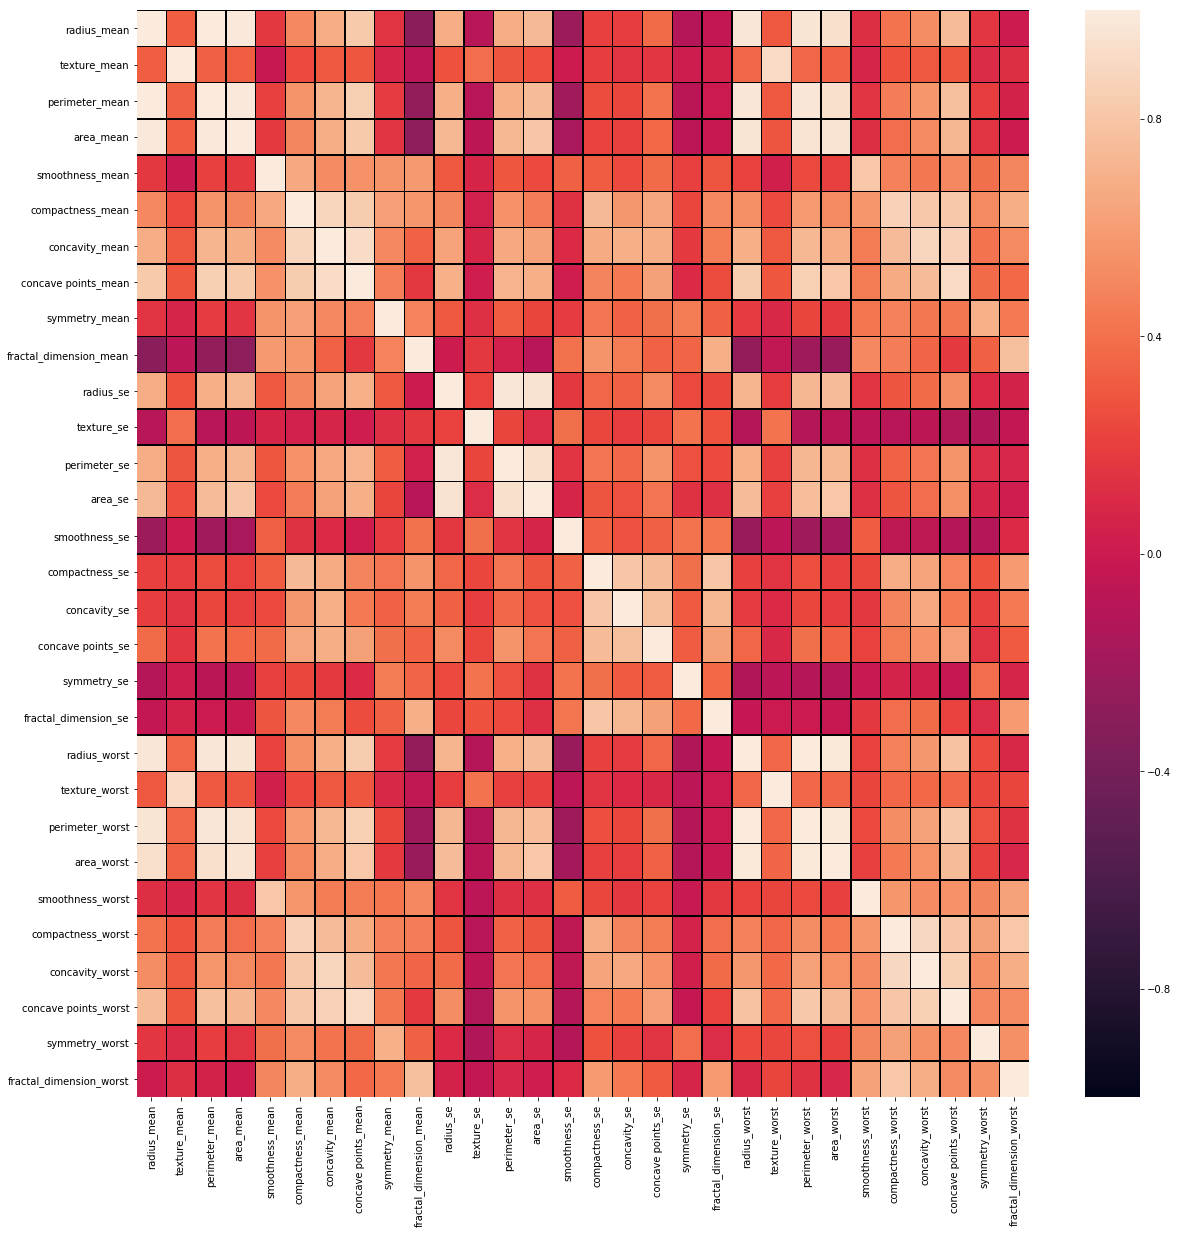

In [14]:
corr=data2.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

In [15]:
x=data2

#### 6) Feature selection

We can find the importances of each feature using a tree classifier as can be seen below

Feature ranking:
1. feature 27 (0.123613)
2. feature 20 (0.102393)
3. feature 23 (0.090718)
4. feature 22 (0.073362)
5. feature 7 (0.069074)
6. feature 0 (0.057682)
7. feature 2 (0.057616)
8. feature 6 (0.055987)
9. feature 3 (0.052329)
10. feature 26 (0.042248)
11. feature 25 (0.027331)
12. feature 21 (0.024081)
13. feature 1 (0.023992)
14. feature 13 (0.023794)
15. feature 12 (0.021898)
16. feature 24 (0.019354)
17. feature 10 (0.017798)
18. feature 5 (0.017481)
19. feature 28 (0.014939)
20. feature 4 (0.011544)
21. feature 29 (0.010375)
22. feature 17 (0.009089)
23. feature 16 (0.008688)
24. feature 15 (0.007596)
25. feature 8 (0.007226)
26. feature 9 (0.006757)
27. feature 18 (0.006067)
28. feature 19 (0.005820)
29. feature 14 (0.005708)
30. feature 11 (0.005441)


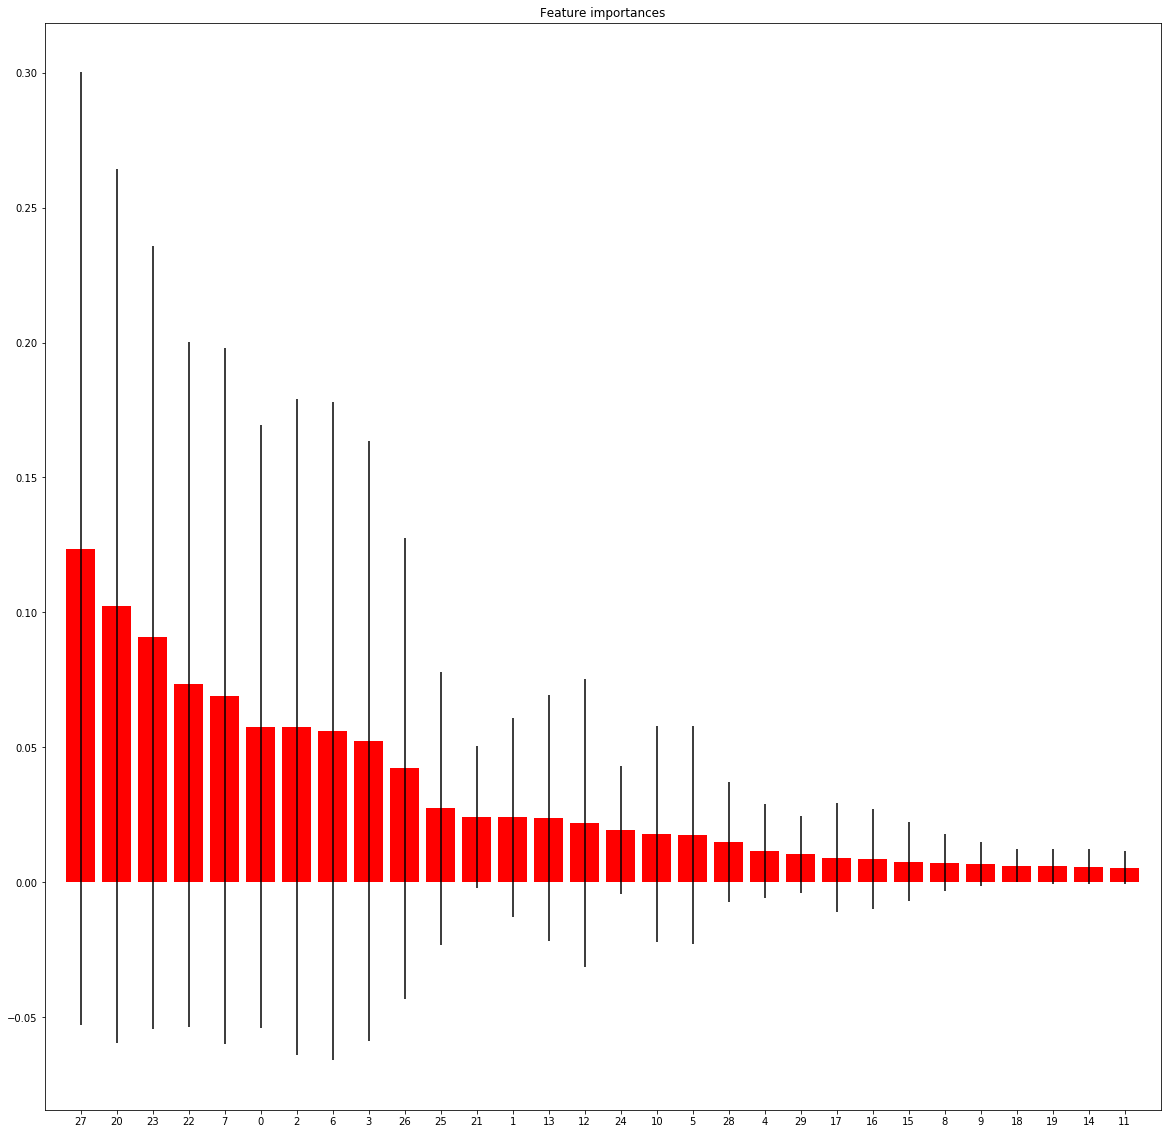

In [16]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(x, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


plt.figure()
plt.subplots(figsize=(20,20))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

Considering only the features with top 10 importances, I'm creating another dataset

In [17]:
features=["radius_mean","perimeter_mean","area_mean",'concavity_mean','concave points_mean',"radius_worst","perimeter_worst","area_worst",'concavity_worst', 'concave points_worst']
d1=x[features]
d1.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1.096100,1.268817,0.983510,2.650542,2.530249,1.885031,2.301575,1.999478,2.107672,2.294058
1,1.828212,1.684473,1.907030,-0.023825,0.547662,1.804340,1.533776,1.888827,-0.146620,1.086129
2,1.578499,1.565126,1.557513,1.362280,2.035440,1.510541,1.346291,1.455004,0.854222,1.953282
3,-0.768233,-0.592166,-0.763792,1.914213,1.450431,-0.281217,-0.249720,-0.549538,1.987839,2.173873
4,1.748758,1.775011,1.824624,1.369806,1.427237,1.297434,1.337363,1.219651,0.612640,0.728618


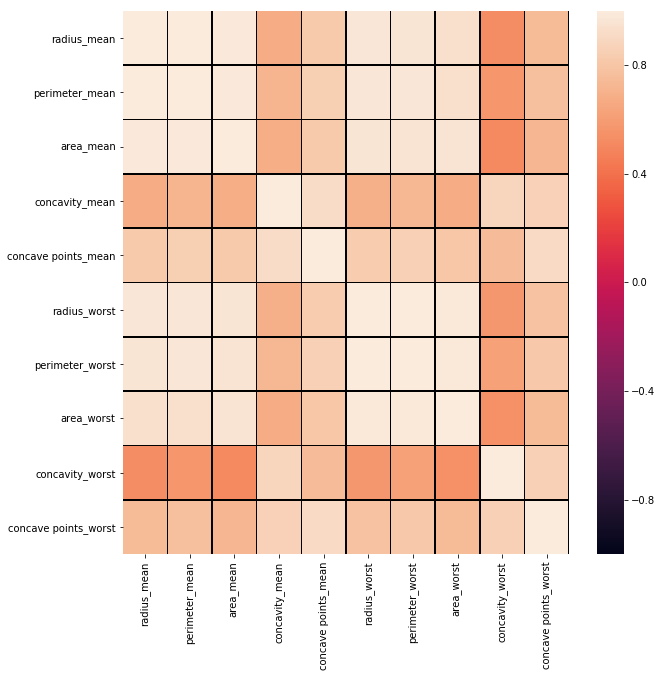

In [18]:
corr=d1.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

The above selected features are highly related

Considering only the features with top 5 importances, I'm creating another dataset

In [19]:
features2=["radius_mean","perimeter_mean","area_mean",'concavity_mean','concave points_mean']
d2=x[features2]
d2.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean
0,1.096100,1.268817,0.983510,2.650542,2.530249
1,1.828212,1.684473,1.907030,-0.023825,0.547662
2,1.578499,1.565126,1.557513,1.362280,2.035440
3,-0.768233,-0.592166,-0.763792,1.914213,1.450431
4,1.748758,1.775011,1.824624,1.369806,1.427237


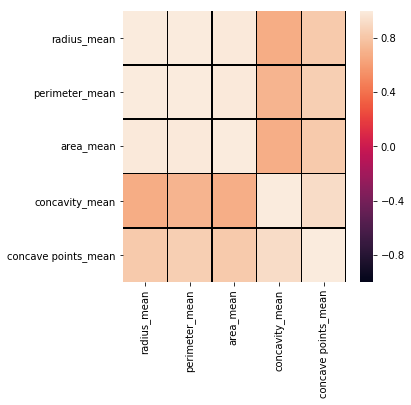

In [20]:
corr=d2.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

Again, the above features too are highly related

Considering repitetive features from the first heatplot, I'm creating two new datasets trying to eliminate redundancy

In [21]:
droplist = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
d3=x.drop(droplist,axis=1)
d3.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,-2.071512,0.983510,1.567087,2.650542,2.215566,2.253764,-0.564768,2.485391,-0.213814,0.723390,1.147747,0.906286,1.306537,2.107672,2.748204,1.935312
1,-0.353322,1.907030,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.741749,-0.604819,-0.440393,-0.804742,-0.099356,-0.375282,-0.146620,-0.243675,0.280943
2,0.455786,1.557513,0.941382,1.362280,0.938859,-0.397658,-0.779398,1.180298,-0.296744,0.212889,0.236827,0.293301,0.526944,0.854222,1.151242,0.201214
3,0.253509,-0.763792,3.280667,1.914213,2.864862,4.906602,-0.110312,-0.288125,0.689095,0.818798,4.728520,2.045711,3.391291,1.987839,6.040726,4.930672
4,-1.150804,1.824624,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.189310,1.481763,0.827742,-0.360775,0.498889,0.220362,0.612640,-0.867590,-0.396751


In [22]:
f=['radius_mean', 'texture_mean','smoothness_mean', 'compactness_mean','symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se','smoothness_se',
       'compactness_se','concave points_se', 'symmetry_se','concavity_worst','symmetry_worst', 'fractal_dimension_worst']
d4=x[f]
d4.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.567087,3.280628,2.215566,2.253764,2.487545,-0.564768,-0.213814,1.315704,0.660239,1.147747,2.107672,2.748204,1.935312
1,1.828212,-0.353322,-0.826235,-0.486643,0.001391,-0.867889,0.498816,-0.875473,-0.604819,-0.692317,0.259933,-0.804742,-0.146620,-0.243675,0.280943
2,1.578499,0.455786,0.941382,1.052000,0.938859,-0.397658,1.227596,-0.779398,-0.296744,0.814257,1.423575,0.236827,0.854222,1.151242,0.201214
3,-0.768233,0.253509,3.280667,3.399917,2.864862,4.906602,0.326087,-0.110312,0.689095,2.741868,1.114027,4.728520,1.987839,6.040726,4.930672
4,1.748758,-1.150804,0.280125,0.538866,-0.009552,-0.561956,1.269426,-0.789549,1.481763,-0.048477,1.143199,-0.360775,0.612640,-0.867590,-0.396751


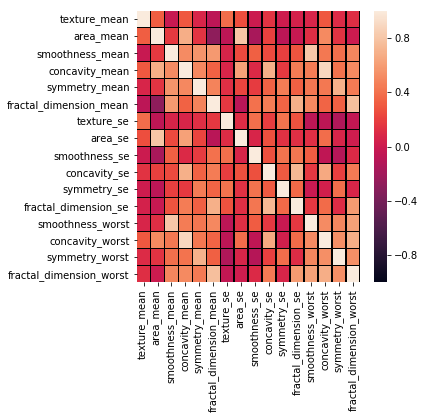

In [23]:
corr=d3.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

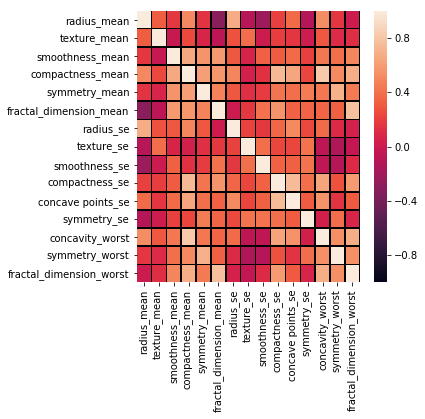

In [24]:
corr=d4.corr()
plt.subplots(figsize=(5,5))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

As can be seen, the above 2 sets, contain less related features

Using forest classifiers, we can also find the optimum number of features and what they are, as shown below

In [28]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x,y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x.columns[rfecv.support_])

Optimal number of features : 28
Best features : Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


I'm creating another dataset with only the above 13 features

In [29]:
#when data was not standardised
f=['area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst']

#after standardising data
#this varies each time the above cell is run
f=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
d5=x[f]
d5.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,texture_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.096100,-2.071512,1.268817,0.983510,3.280628,2.650542,2.530249,2.215566,2.487545,-0.564768,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.486643,-0.023825,0.547662,0.001391,0.498816,-0.875473,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,1.052000,1.362280,2.035440,0.938859,1.227596,-0.779398,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.399917,1.914213,1.450431,2.864862,0.326087,-0.110312,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.538866,1.369806,1.427237,-0.009552,1.269426,-0.789549,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751


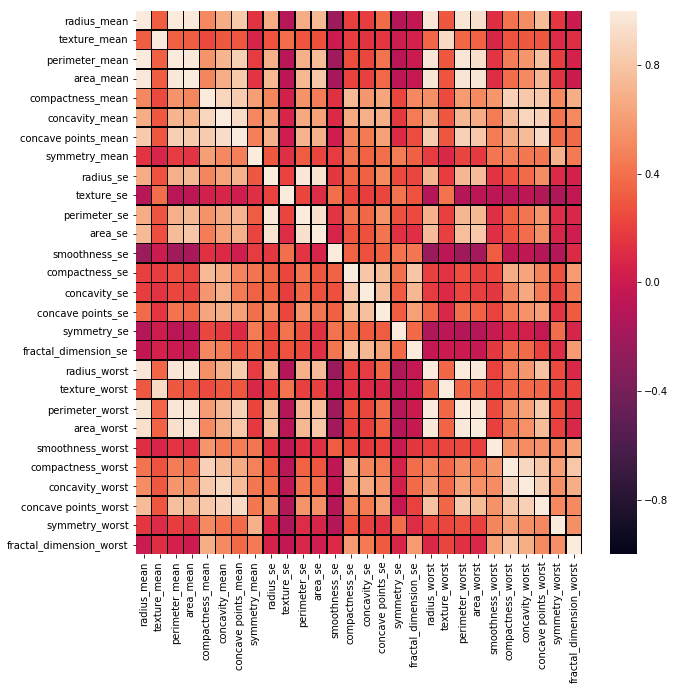

In [30]:
corr=d5.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,linecolor='black',linewidths='0.5',vmin=-1,vmax=1)

This dataset contains slightly related features.

#### 7) Apply Machine Learning models 

I'm going to apply 6 different machine learning algorithms to each of the above datasets and see which gives the highest accuracy.

###### KNN

In [31]:
def knn(data) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    return

In [32]:
print("all features")
knn(x)
print("dataset 1")
knn(d1)
print("dataset 2")
knn(d2)
print("dataset 3")
knn(d3)
print("dataset 4")
knn(d4)
print("dataset 5")
knn(d5)

all features
0.959064327485
dataset 1
0.929824561404
dataset 2
0.912280701754
dataset 3
0.918128654971
dataset 4
0.918128654971
dataset 5
0.959064327485


KNN works best with all features and with the "important" features. But, its accuracy is still lower compared to most of the other models.

###### Decision Tree

In [33]:
def dtree(data) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)
    dt = DecisionTreeClassifier()
    dt.fit(X_train, Y_train)
    predictions = dt.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    return

In [36]:
print("all features")
dtree(x)
print("dataset 1")
dtree(d1)
print("dataset 2")
dtree(d2)
print("dataset 3")
dtree(d3)
print("dataset 4")
dtree(d4)
print("dataset 5")
dtree(d5)

all features
0.918128654971
dataset 1
0.941520467836
dataset 2
0.900584795322
dataset 3
0.87134502924
dataset 4
0.929824561404
dataset 5
0.912280701754


Decision tree works best with  the "important" features. Its accuracy is less when compared to the other models.

###### Random Forest

In [37]:
def rforest(data,s) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)
    rf=RandomForestClassifier(random_state=s)
    rf.fit(X_train, Y_train)
    predictions = rf.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    return

In [42]:
print("all features")
rforest(x,3)
print("dataset 1")
rforest(d1,30)
print("dataset 2")
rforest(d2,42)
print("dataset 3")
rforest(d3,25)
print("dataset 4")
rforest(d4,60)
print("dataset 5")
rforest(d5,7)


all features
0.988304093567
dataset 1
0.964912280702
dataset 2
0.947368421053
dataset 3
0.964912280702
dataset 4
0.947368421053
dataset 5
0.976608187135


Random forest gives the highest accuracy when compared to other models.
Accuracy is highest for all features and for the optimum number of features and those features.

###### SVC

In [43]:
def svcc(data) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)
    svc=SVC()
    svc.fit(X_train, Y_train)
    predictions = svc.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    return

In [44]:
print("all features")
svcc(x)
print("dataset 1")
svcc(d1)
print("dataset 2")
svcc(d2)
print("dataset 3")
svcc(d3)
print("dataset 4")
svcc(d4)
print("dataset 5")
svcc(d5)

all features
0.976608187135
dataset 1
0.93567251462
dataset 2
0.918128654971
dataset 3
0.970760233918
dataset 4
0.970760233918
dataset 5
0.976608187135


SVC gives a good accuracy when compared to the other models.
Its accuracy is high for the dataset with least number of related features.
It probably works well with unrelated feature.
Accuracy is highest for all features and for the optimum number of features and those features.

###### Logistic Regression

In [45]:
def logreg(data) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    predictions = lr.predict(X_validation)
    print(accuracy_score(Y_validation, predictions))
    return

In [46]:
print("all features")
logreg(x)
print("dataset 1")
logreg(d1)
print("dataset 2")
logreg(d2)
print("dataset 3")
logreg(d3)
print("dataset 4")
logreg(d4)
print("dataset 5")
logreg(d5)

all features
0.982456140351
dataset 1
0.93567251462
dataset 2
0.906432748538
dataset 3
0.964912280702
dataset 4
0.970760233918
dataset 5
0.976608187135


Logistic Regression gives the second best accuracy when compared to the other models.
Its highest accuracy is for all features and the "important" features( because of regularisation).
Lesser number of features reduces accuracy mainly due to overfitting of data.

###### Neural networks MLP

In [47]:
def mlpc(data) :
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(data, y, test_size=0.3, random_state=0)

    mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

    mlp.fit(X_train, Y_train)
    print("Training set score: %f" % mlp.score(X_train, Y_train))
    print("Test set score: %f" % mlp.score(X_validation, Y_validation))
    print()

In [48]:
print("all features")
mlpc(x)
print("dataset 1")
mlpc(d1)
print("dataset 2")
mlpc(d2)
print("dataset 3")
mlpc(d3)
print("dataset 4")
mlpc(d4)
print("dataset 5")
mlpc(d5)

all features
Iteration 1, loss = 0.48964893
Iteration 2, loss = 0.26509177
Iteration 3, loss = 0.17337662
Iteration 4, loss = 0.13707268
Iteration 5, loss = 0.11735081
Iteration 6, loss = 0.10444799
Iteration 7, loss = 0.09491602
Iteration 8, loss = 0.08752354
Iteration 9, loss = 0.08112677
Iteration 10, loss = 0.07675877
Iteration 11, loss = 0.07304545
Iteration 12, loss = 0.07022736
Iteration 13, loss = 0.06800169
Iteration 14, loss = 0.06540892
Iteration 15, loss = 0.06354506
Iteration 16, loss = 0.06148298
Iteration 17, loss = 0.05938021
Iteration 18, loss = 0.05796847
Iteration 19, loss = 0.05585581
Iteration 20, loss = 0.05389671
Training set score: 0.982412
Test set score: 0.964912

dataset 1
Iteration 1, loss = 0.58182537
Iteration 2, loss = 0.31294503
Iteration 3, loss = 0.20510314
Iteration 4, loss = 0.16884300
Iteration 5, loss = 0.15633062
Iteration 6, loss = 0.15216228
Iteration 7, loss = 0.15202272
Iteration 8, loss = 0.15216003
Iteration 9, loss = 0.15205312
Iteration 10

C:\Users\arpithar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP also gives a pretty good accuracy when compared to the other models  for the optimum number of features and those features and for the dataset with the least number of related features. 

###### Random Forest and Logistic Regression work best on this dataset

Standardisation helped improve the accuracy of all models.